In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [2]:
elasticity = pd.read_csv("elasticity_total.csv")

In [3]:
elasticity.head()

,asset,shock,elasticity
0,-3.000000,1.0,-12.107001
1,-2.888889,1.0,-9.566653
2,-2.777778,1.0,-8.156620
3,-2.666667,1.0,-7.244811
4,-2.555556,1.0,-6.355943


In [5]:
def create_grid(df,x,y,z):
    # 2D-arrays from DataFrame
    x1 = np.linspace(df[x].min(), df[x].max(), len(df[x].unique()))

    y1 = np.linspace(df[y].min(), df[y].max(), len(df[y].unique()))


    x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
    z2 = griddata((df[x], df[y]), df[z], (x2, y2), method='linear')
    
    return x2, y2, z2

C:\Users\mwaugh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


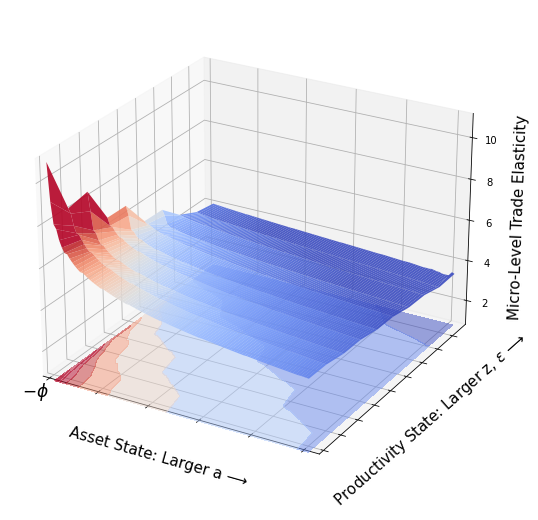

In [25]:
x, y, z = create_grid(elasticity,"asset","shock","elasticity")

fig = plt.figure(figsize = (15,9))

ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, -1.0*z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=3.5, vmax=7),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = .50

ax.contourf(x, y, -1*z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=3, vmax=7), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.35)
ax.set_xticklabels([])

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(1.0)

ax.text(-2.75, 0.25, 0, "$-\phi$", fontsize = 17)


ax.set_ylabel("\n Productivity State: Larger z, $\epsilon$ ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Micro-Level Trade Elasticity ", fontsize = 15)

#plt.savefig("../notes/figures/micro-elasticity.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [54]:
elasticity.tail(50)

,asset,shock,elasticity
450,2.555556,5.0,-3.762888
451,2.666667,5.0,-3.754897
452,2.777778,5.0,-3.746573
453,2.888889,5.0,-3.738256
454,3.000000,5.0,-3.729983
455,3.111111,5.0,-3.721979
456,3.222222,5.0,-3.713998
457,3.333333,5.0,-3.705723
458,3.444444,5.0,-3.697050
459,3.555556,5.0,-3.688362


In [27]:
trade_share = pd.read_csv("trade_share.csv")

C:\Users\mwaugh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


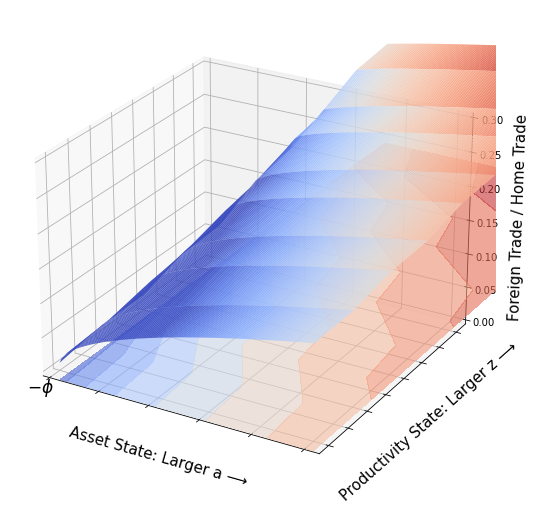

In [28]:
x, y, z = create_grid(trade_share,"asset","shock","elasticity")

fig = plt.figure(figsize = (15,9))

ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=0.08, vmax=0.20),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -0.02

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=0, vmax=0.20), 
                  alpha = 0.60, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.35)
ax.set_ylim(0.85,4.7)
ax.set_zlim(0.0,.30)

ax.text(-2.75, 0.65, -.03, "$-\phi$", fontsize = 17)

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.set_ylabel("\n Productivity State: Larger z ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Foreign Trade / Home Trade ", fontsize = 15)

#plt.savefig("../notes/figures/trade-share.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

In [29]:
trade_share.head()

,asset,shock,elasticity
0,-3.000000,1.0,0.106622
1,-2.888889,1.0,0.106622
2,-2.777778,1.0,0.106622
3,-2.666667,1.0,0.106622
4,-2.555556,1.0,0.106622


In [30]:
z

array([[0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10662224, 0.10662224,
        0.10662224, 0.10662224, 0.10662224, 0.10